In [17]:
from stats import *


Summary statistics:
              A         B
count  5.000000  4.000000
mean   3.000000  2.400000
std    1.581139  0.182574
min    1.000000  2.200000
25%    2.000000  2.275000
50%    3.000000  2.400000
75%    4.000000  2.525000
max    5.000000  2.600000

Data types:
A      int64
B    float64
C     object
dtype: object

Missing values:
A    0
B    1
C    0
dtype: int64

Unique values:
A: 5
B: 4
C: 3

First 5 rows:
   A    B       C
0  1  2.2   apple
1  2  2.3  orange
2  3  2.5  banana
3  4  2.6   apple
4  5  NaN  orange

Correlations:
          A         B
A  1.000000  0.989949
B  0.989949  1.000000

Correlations with background gradient:


/Users/david/git-repos/pystats/eda.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/Users/david/git-repos/pystats/eda.py:32: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_styled = corr.style.background_gradient().set_precision(2)


,A,B
A,1.00,0.99
B,0.99,1.00



Boxplots:


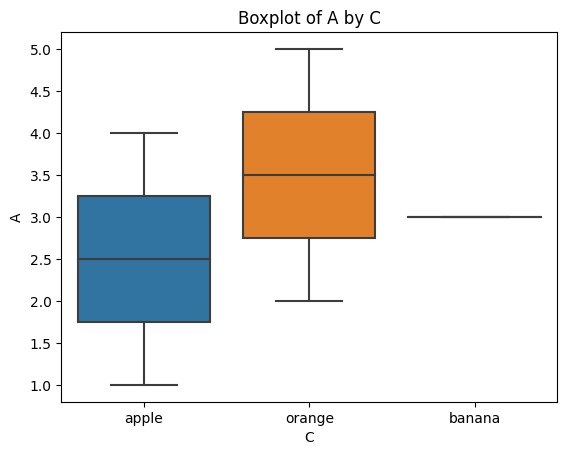

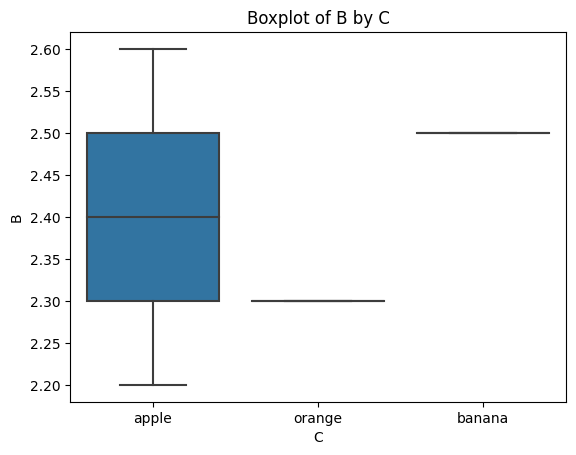


Distribution plots:


<Figure size 640x480 with 0 Axes>

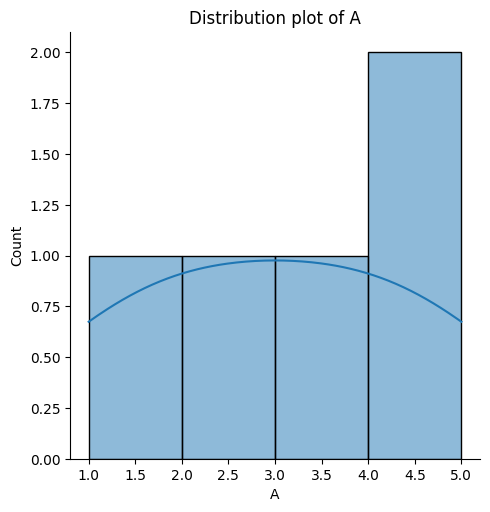

<Figure size 640x480 with 0 Axes>

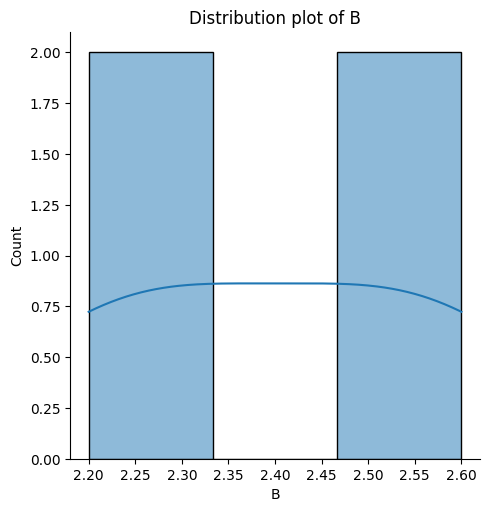


Countplots:


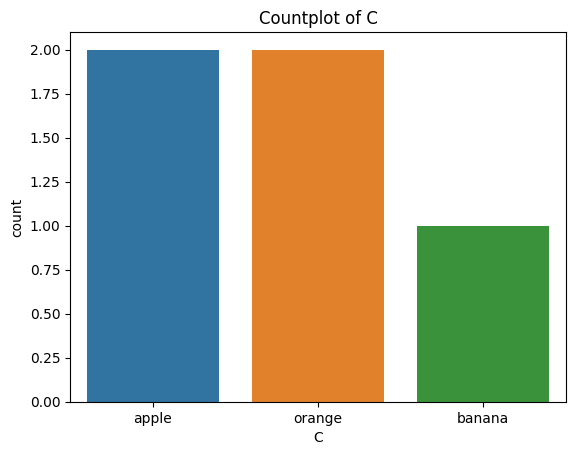


Correlation Heatmap:


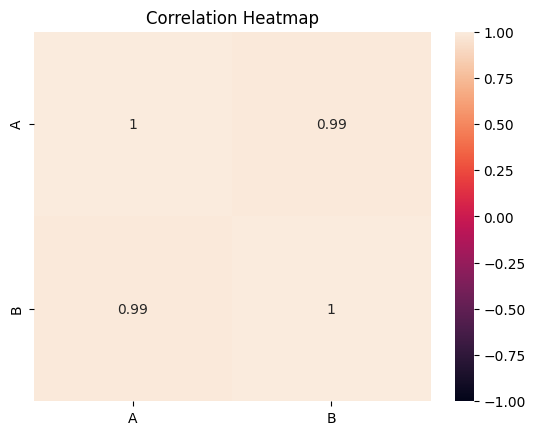

In [18]:
import pandas as pd

data = {
    "A": [1, 2, 3, 4, 5],
    "B": [2.2, 2.3, 2.5, 2.6, None],
    "C": ["apple", "orange", "banana", "apple", "orange"],
}

df = pd.DataFrame(data)
basic_eda(df)


100%|██████████| 3/3 [00:00<00:00, 106.77it/s]

Group 0 vs Group 1: t-statistic = -6.710, p-value = 0.000
Group 0 vs Group 2: t-statistic = -11.471, p-value = 0.000
Group 1 vs Group 2: t-statistic = -6.268, p-value = 0.000


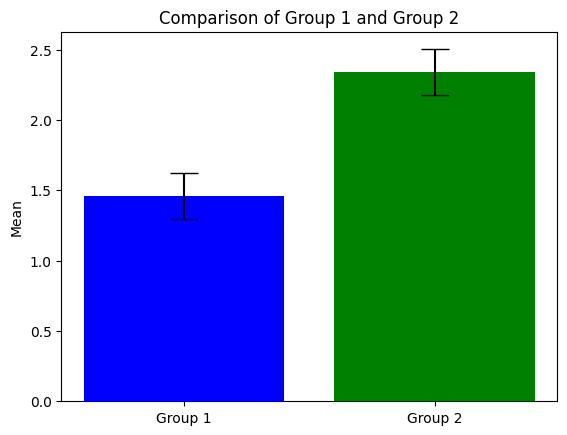

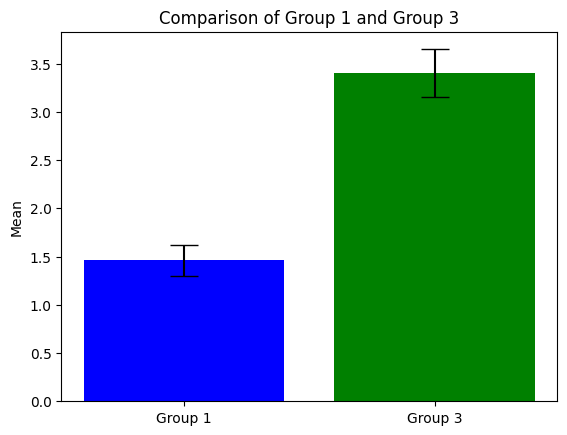

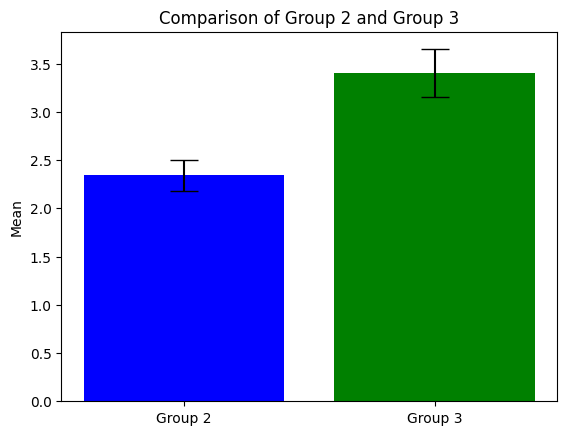

In [19]:

data = [
    [1.2, 1.3, 1.5, 1.6, 1.7],
    [2.1, 2.2, 2.3, 2.5, 2.6],
    [3.0, 3.2, 3.4, 3.6, 3.8],
]

results = pairwise_t_tests(data)

for i, j, t_stat, p_value in results:
    print(f"Group {i} vs Group {j}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")


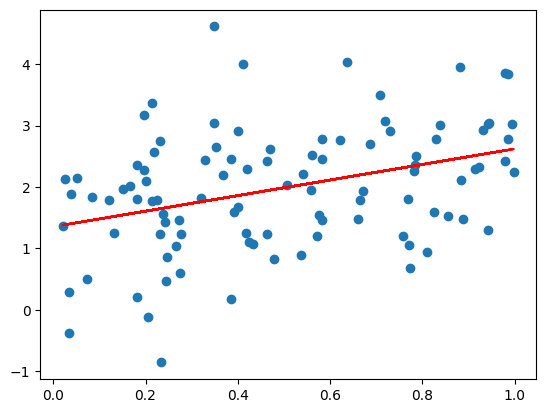

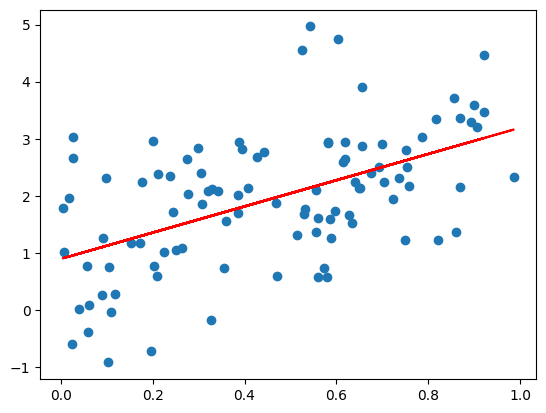

Mean Squared Error: 0.9926563650822541


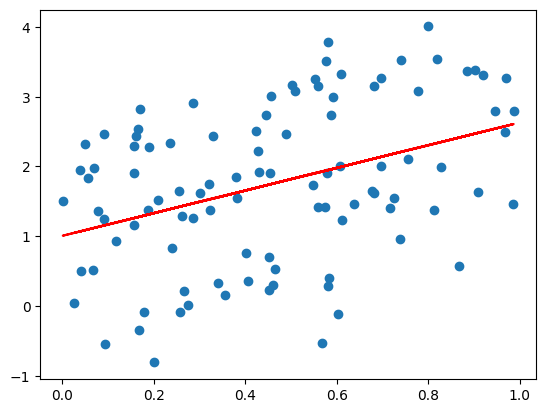

R-squared value: 0.15053159226892576


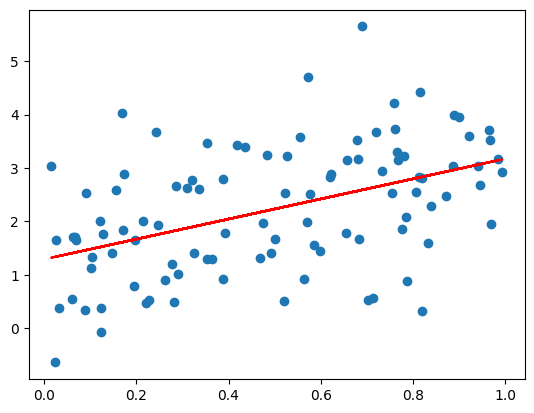

R-squared value: 0.21530858849417622


In [4]:
import numpy as np

# Generate random data for a simple linear regression problem
X = np.random.rand(100, 1)
y = 2*X + 1 + np.random.randn(100, 1)

# Call the linear_regression function with the random data
slope, intercept = linear_regression(X, y)


import numpy as np

# Generate random data for a simple linear regression problem
X = np.random.rand(100, 1)
y = 2*X + 1 + np.random.randn(100, 1)

# Call the linear_regression function with the random data
slope, intercept = linear_regression(X, y)

# Calculate the predicted values of y
y_pred = slope*X + intercept

# Calculate the mean squared error
mse = np.mean((y - y_pred)**2)

print("Mean Squared Error:", mse)

import numpy as np

# Generate random data for a simple linear regression problem
X = np.random.rand(100, 1)
y = 2*X + 1 + np.random.randn(100, 1)

# Call the linear_regression function with the random data
slope, intercept = linear_regression(X, y)

# Calculate the predicted values of y
y_pred = slope*X + intercept

# Calculate the total sum of squares
tss = np.sum((y - np.mean(y))**2)

# Calculate the residual sum of squares
rss = np.sum((y - y_pred)**2)

# Calculate the R-squared value
r_squared = 1 - (rss/tss)

print("R-squared value:", r_squared)

import numpy as np

# Generate random data for a simple linear regression problem
X = np.random.rand(100, 1)
y = 2*X + 1 + np.random.randn(100, 1)

# Call the linear_regression function with the random data
slope, intercept = linear_regression(X, y)

# Calculate the predicted values of y
y_pred = slope*X + intercept

# Calculate the total sum of squares
tss = np.sum((y - np.mean(y))**2)

# Calculate the residual sum of squares
rss = np.sum((y - y_pred)**2)

# Calculate the R-squared value
r_squared = 1 - (rss/tss)

print("R-squared value:", r_squared)

In [13]:
import pystan
import numpy as np
import matplotlib.pyplot as plt

# Define the Stan model
model_code = """
data {
  int<lower=0> N;
  vector[N] x;
  vector[N] y;
}
parameters {
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model {
  y ~ normal(alpha + beta * x, sigma);
}
"""

# Compile the model
model = pystan.StanModel(model_code=model_code)

# Generate some example data
N = 100
x = np.random.normal(0, 1, N)
y = 2 * x + np.random.normal(0, 1, N)

# Fit the model to the data
fit = model.sampling(data={"N": N, "x": x, "y": y})

# Extract the posterior samples of the parameters
alpha_samples = fit.extract("alpha")["alpha"]
beta_samples = fit.extract("beta")["beta"]
sigma_samples = fit.extract("sigma")["sigma"]

# Plot the posterior distributions of the parameters
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].hist(alpha_samples, bins=30)
axes[0].set_title("alpha")
axes[1].hist(beta_samples, bins=30)
axes[1].set_title("beta")
axes[2].hist(sigma_samples, bins=30)
axes[2].set_title("sigma")
plt.show()

ModuleNotFoundError: No module named 'pystan'